<a href="https://colab.research.google.com/github/Sahita9/CallerScan-Database-Management-System/blob/main/Application_(Python)_Updates_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip3 install pymysql
# !pip3 install ipython-sql
# !pip3 install mysqlclient
import warnings
warnings.filterwarnings("ignore")

#### Importing Libraries

In [ ]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

#### Connecting to MySQL database

In [ ]:
db_name = "callerscan1"
db_host = "localhost"
db_username = "root"
db_password = "NicySahita@20"

try:
    conn = pymysql.connect(host=db_host, port = int(3306), user = 'root', passwd = db_password, db= db_name)
except e:
    print(e)

if conn:
    print("You are connected to database")
else :
    print("error")

You are connected to database


#### Query 1 : Find the total count of logins for each user, but only show users who have logged in more than 10 times.

In [ ]:
df1 = pd.read_sql_query("""
SELECT Login_User_ID, COUNT(*) AS LoginCount
FROM login_history
GROUP BY Login_User_ID
HAVING LoginCount > 10;
""", conn)
df1

,Login_User_ID,LoginCount
0,17,15


#### Query 2 : Retrieve the names of users who have subscribed to the "Monthly" subscription type, and order the results by their names.

In [ ]:
df2 = pd.read_sql_query("""SELECT User.Name
FROM User
JOIN Subscription ON User.User_ID = Subscription.Subscription_User_ID
JOIN SubscriptionType ON Subscription.SubscriptionTypeID = SubscriptionType.SubscriptionTypeID
WHERE SubscriptionType.SubscriptionTypeName = 'Monthly'
ORDER BY User.Name;""", conn)
df2

,Name
0,Abbie Friesen
1,Avery Hahn
2,Beatrice Muller
3,Brandi King
4,Candido Sipes
5,Carmela Barton PhD
6,Dorian Thompson
7,Dr. Athena Wyman V
8,Dr. Stanford Huels V
9,Edgar Turner Sr.


#### Query 3 : Retrieve the SpamID, ReportedPhoneNumber, Reason of those who have been reported for the reason "Telemarketing."

In [ ]:
df3 = pd.read_sql_query("""select SpamID, ReportedPhoneNumber, Reason from Spam
where Reason = 'Telemarketing'""", conn)
df3

,SpamID,ReportedPhoneNumber,Reason
0,3,+46(8)5305437963,Telemarketing
1,7,+00(4)8175757578,Telemarketing
2,16,368-962-6070x366,Telemarketing


#### Query 4 : Find a particular business using industry type -Entertainment and zip code - 24017-1241 in the "Business" table

In [ ]:
df4 = pd.read_sql_query("""SELECT User.Name, User.ContactNumber, Business.IndustryType, Business.ZipCode
FROM User
JOIN Business ON User.User_ID = Business.Business_User_ID
WHERE Business.IndustryType = 'Entertainment'
AND Business.ZipCode = '24017-1241'; """,conn)
df4

,Name,ContactNumber,IndustryType,ZipCode
0,Gino Shanahan,(930)479-7817x43118,Entertainment,24017-1241


#### Query 5 : Find all users who have made or received more than 10 calls in  in the month of November 2023, grouped by subscription type.

In [ ]:
df5 =pd.read_sql_query("""SELECT st.SubscriptionTypeName, COUNT(u.User_ID) AS UserCount
FROM User u
INNER JOIN Subscription s ON u.User_ID = s.Subscription_User_ID
INNER JOIN SubscriptionType st ON s.SubscriptionTypeID = st.SubscriptionTypeID
WHERE EXISTS (
    SELECT 1
    FROM CallLog c
    WHERE (c.CallerUserID = u.User_ID OR c.ReceiverUserID = u.User_ID)
    AND YEAR(c.CallDateTime) = 2023
    AND MONTH(c.CallDateTime) = 11
)
GROUP BY st.SubscriptionTypeName
HAVING UserCount > 10;
""", conn)
df5

,SubscriptionTypeName,UserCount
0,Free,22
1,Monthly,33
2,Annual,45


#### Analysis on User Ratings

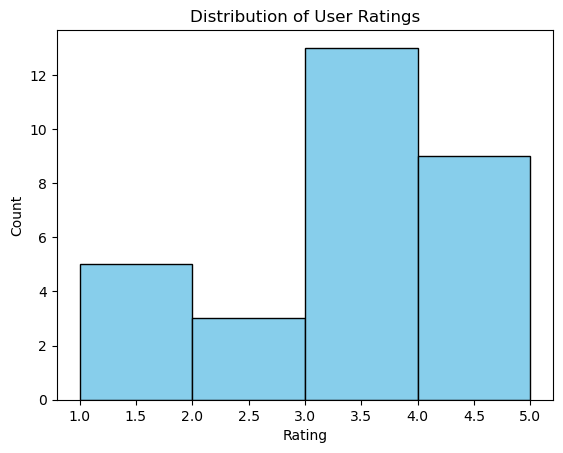

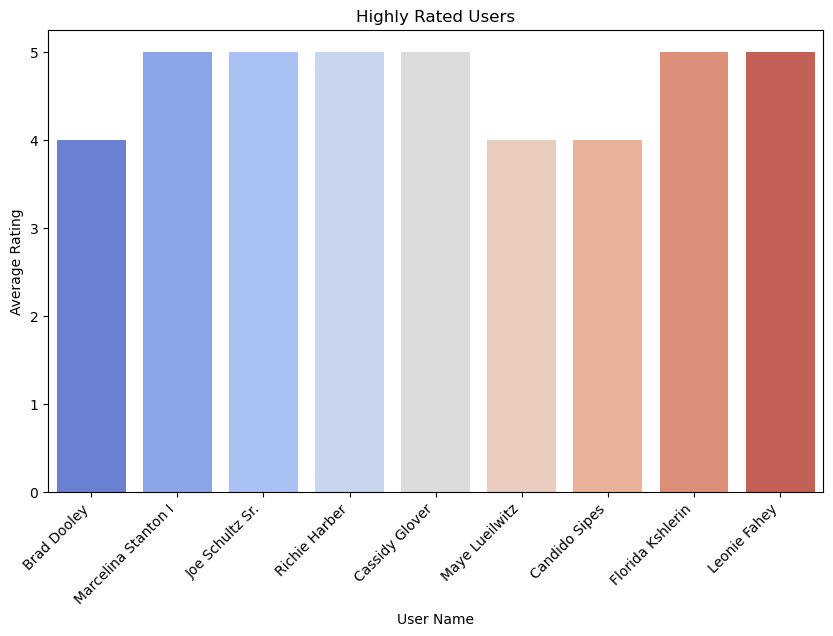

In [ ]:
import seaborn as sns
user_rating_df = pd.read_sql_query("SELECT Rating FROM userrating", conn)

# Plotting histogram
plt.hist(user_rating_df['Rating'], bins=[1, 2, 3, 4, 5], edgecolor='black',color='skyblue')
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Identify highly rated users
highly_rated_users_query = """
    SELECT u.Name, AVG(ur.Rating) AS AvgRating
    FROM User u
    JOIN UserRating ur ON u.User_ID = ur.RatedCallerID
    GROUP BY u.User_ID
    HAVING AVG(ur.Rating) >= 4;
"""
highly_rated_users = pd.read_sql_query(highly_rated_users_query,conn)

# Visualize highly rated users
plt.figure(figsize=(10, 6))
sns.barplot(x='Name', y='AvgRating', data=highly_rated_users, palette='coolwarm')
plt.title('Highly Rated Users')
plt.xlabel('User Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()


#### Analysis on Subscription Types

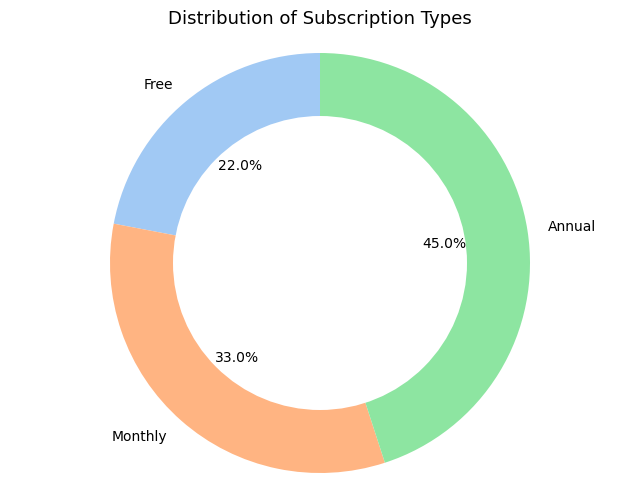

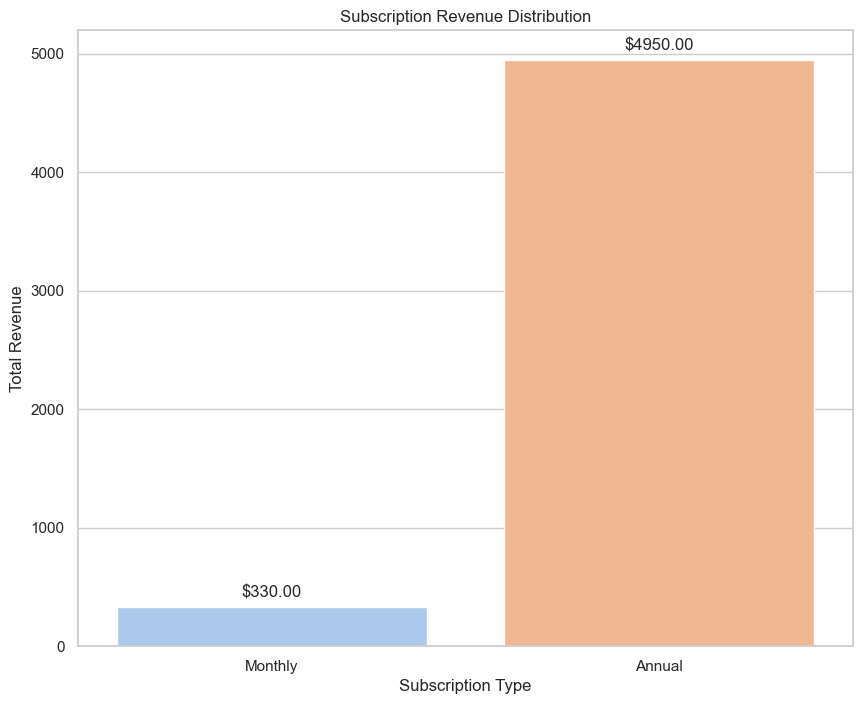

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read subscription data
subscription_df = pd.read_sql_query("""
    SELECT SubscriptionTypeName, COUNT(*) AS Count
    FROM subscriptiontype s
    JOIN subscription sub ON s.SubscriptionTypeID = sub.SubscriptionTypeID
    GROUP BY SubscriptionTypeName;
""", conn)

# Custom color palette for the pie chart
colors = sns.color_palette("pastel")

# Plotting an insightful pie chart with annotations
plt.figure(figsize=(8, 6))
plt.pie(subscription_df['Count'], labels=subscription_df['SubscriptionTypeName'], autopct='%1.1f%%', colors=colors, startangle=90)

# Adding a circle in the middle to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Customizing the plot
plt.title('Distribution of Subscription Types', fontsize=13)
plt.axis('equal')

# Display the plot
plt.show()

# Calculate subscription revenue
subscription_revenue_query = """
    SELECT st.SubscriptionTypeName, SUM(st.SubscriptionTypePrice) AS TotalRevenue
    FROM Subscription s
    JOIN SubscriptionType st ON s.SubscriptionTypeID = st.SubscriptionTypeID
    GROUP BY st.SubscriptionTypeName;
"""
subscription_revenue = pd.read_sql_query(subscription_revenue_query,conn)

import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'subscription_revenue' is a DataFrame with columns 'SubscriptionTypeName' and 'TotalRevenue'

# Exclude the 'Free' subscription type from the bar chart
filtered_subscription_revenue = subscription_revenue[subscription_revenue['SubscriptionTypeName'] != 'Free']

# Set the style for the plot
sns.set(style="whitegrid")

# Visualize subscription revenue without 'Free' with a bar chart
plt.figure(figsize=(10, 8))
bar_chart = sns.barplot(x='SubscriptionTypeName', y='TotalRevenue', data=filtered_subscription_revenue, palette="pastel")

# Add revenue values on top of each bar with currency symbol
for p in bar_chart.patches:
    bar_chart.annotate(f"${p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Subscription Revenue Distribution')
plt.xlabel('Subscription Type')
plt.ylabel('Total Revenue')
plt.show()


#### Analysis on Blocklist Reasons

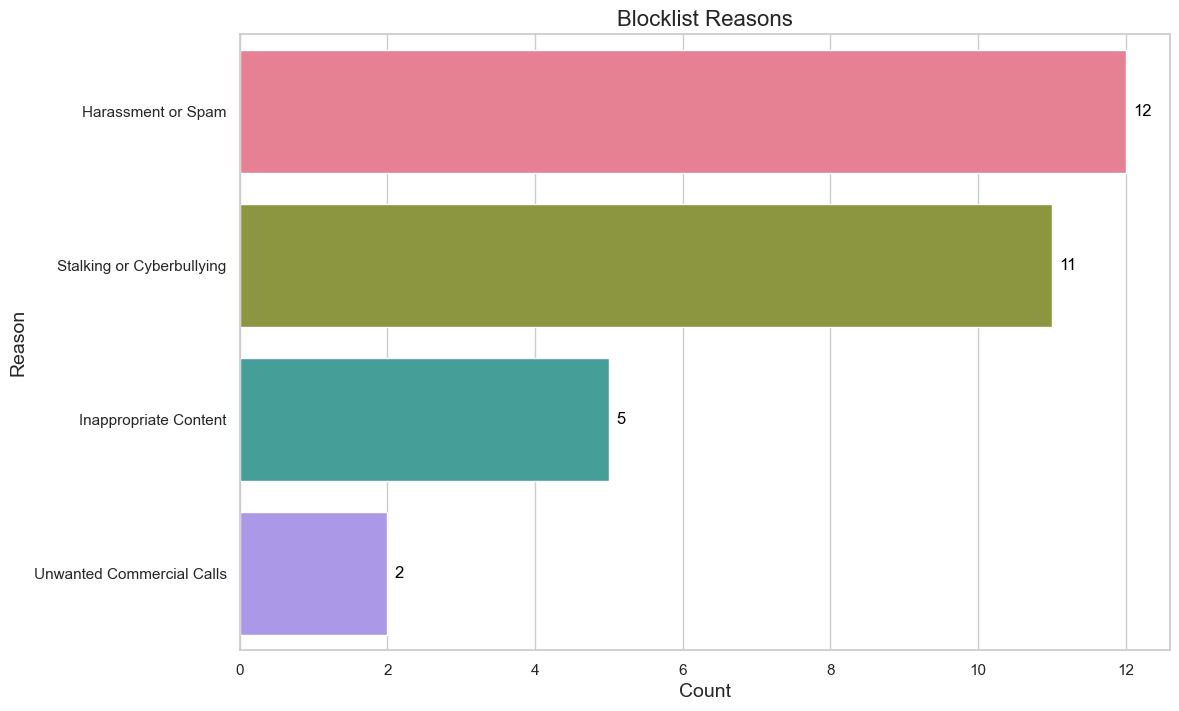

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read blocklist data
blocklist_df = pd.read_sql_query("SELECT Reason FROM BlockList;", conn)

    # Custom color palette for the bar chart
colors = sns.color_palette("husl", len(blocklist_df['Reason'].unique()))

    # Plotting a horizontal bar chart for better readability
plt.figure(figsize=(12, 8))
sns.countplot(y='Reason', data=blocklist_df, palette=colors, order=blocklist_df['Reason'].value_counts().index)

    # Adding counts on top of each bar
for i, count in enumerate(blocklist_df['Reason'].value_counts()):
    plt.text(count + 0.1, i, str(count), va='center', fontsize=12, color='black')

    # Customizing the plot
plt.title('Blocklist Reasons', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Reason', fontsize=14)

    # Display the plot
plt.show()

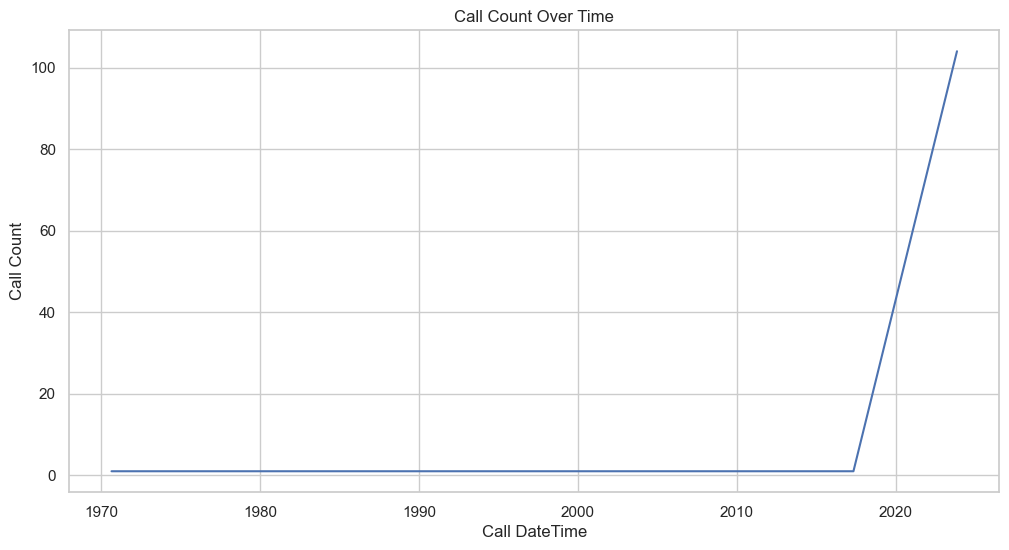

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already connected to the database and fetched the data
# For the sake of this example, let's assume the DataFrame is named 'call_log_df'

# Sample query to fetch data (replace this with your actual query)
query = "SELECT CallDateTime, COUNT(*) AS CallCount FROM CallLog GROUP BY CallDateTime ORDER BY CallDateTime;"
call_log_df =  pd.read_sql_query(query, conn)

# Assuming the 'CallDateTime' column is in datetime format
call_log_df['CallDateTime'] = pd.to_datetime(call_log_df['CallDateTime'])

# Plotting the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='CallDateTime', y='CallCount', data=call_log_df)

# Customizing the plot
plt.title('Call Count Over Time')
plt.xlabel('Call DateTime')
plt.ylabel('Call Count')

# Display the plot
plt.show()


DataFrame:
   SubscriptionStartDate  TotalSubscriptions
0             2009-05-07                   1
1             1974-05-23                   1
2             2008-12-03                   1
3             1991-05-07                   1
4             2023-02-28                   1
..                   ...                 ...
95            2023-05-01                   1
96            2023-04-30                   1
97            2023-04-29                   1
98            2023-04-28                   1
99            2023-04-27                   1

[100 rows x 2 columns]


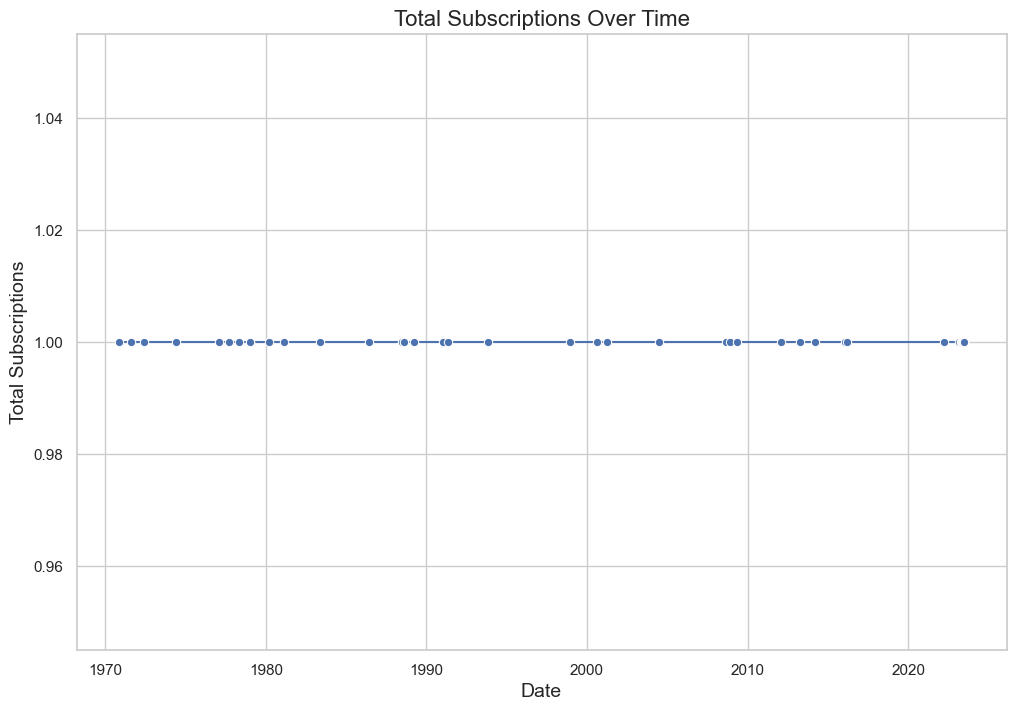

In [ ]:
# Example query to retrieve data
query = "SELECT SubscriptionStartDate,count(SubscriptionID) AS TotalSubscriptions FROM Subscription GROUP BY SubscriptionStartDate"

# Execute the query and load the result into a DataFrame
try:
    df =  pd.read_sql_query(query, conn)
except pd.errors.EmptyDataError:
    print("No data found.")
    df = pd.DataFrame()

# Close the database connection
conn.close()

# Display the DataFrame
print("DataFrame:")
print(df)

# Visualize the data using a line chart with Seaborn
if not df.empty:
    plt.figure(figsize=(12, 8))
    sns.lineplot(x="SubscriptionStartDate", y="TotalSubscriptions", data=df, marker="o", color='b')

    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Total Subscriptions", fontsize=14)
    plt.title("Total Subscriptions Over Time", fontsize=16)
    plt.show()

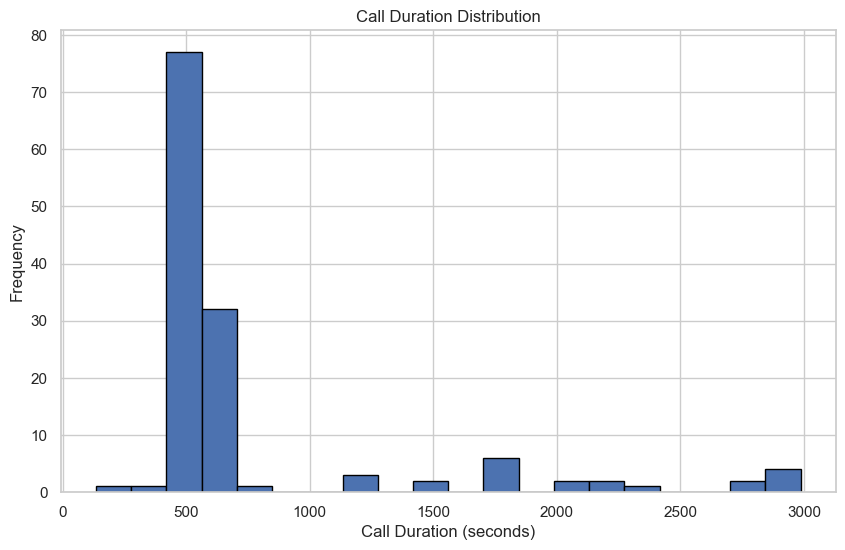

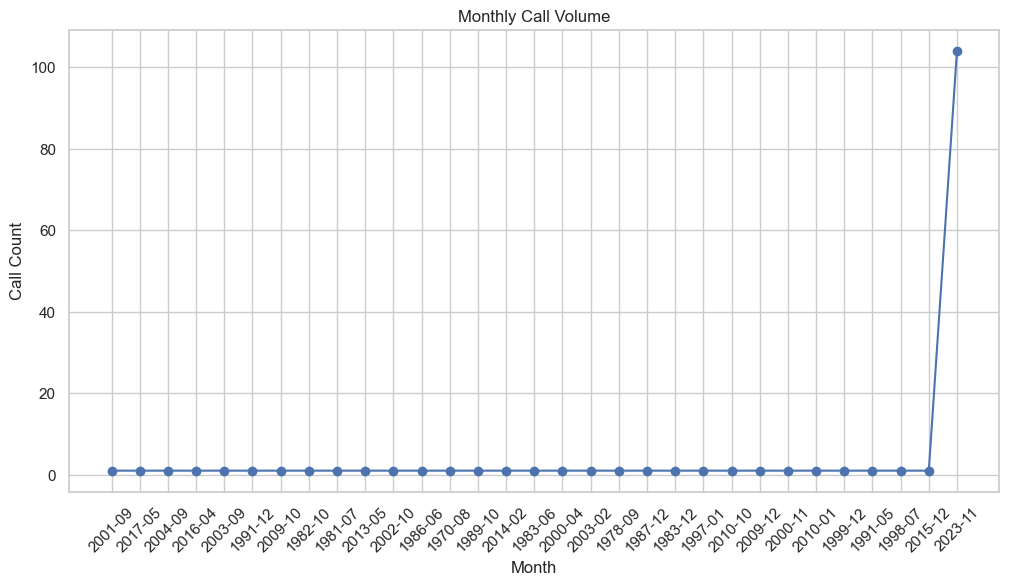

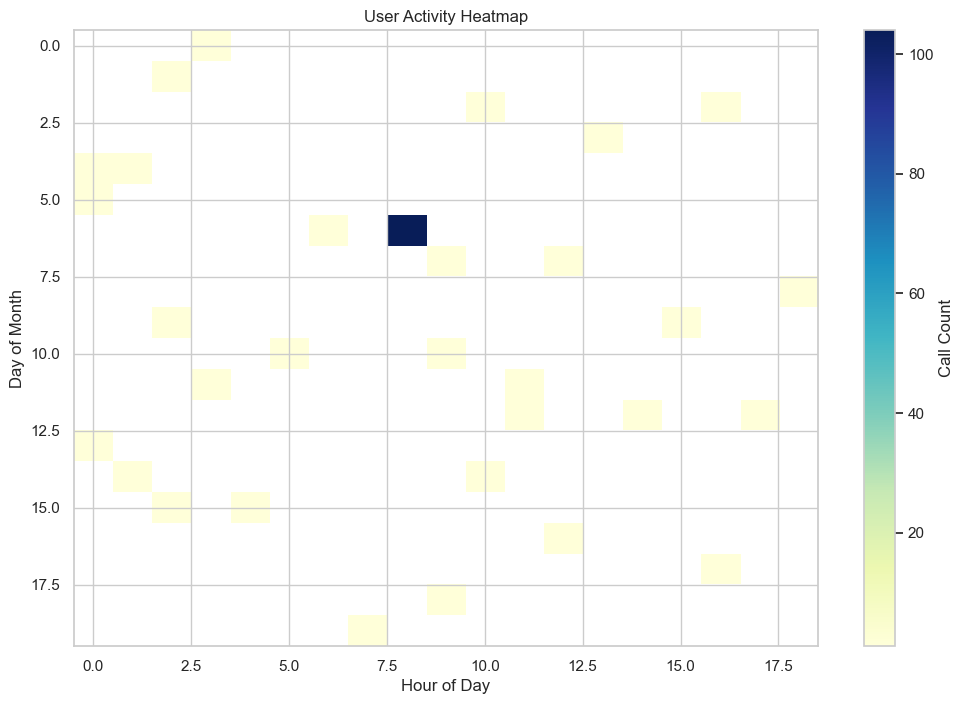

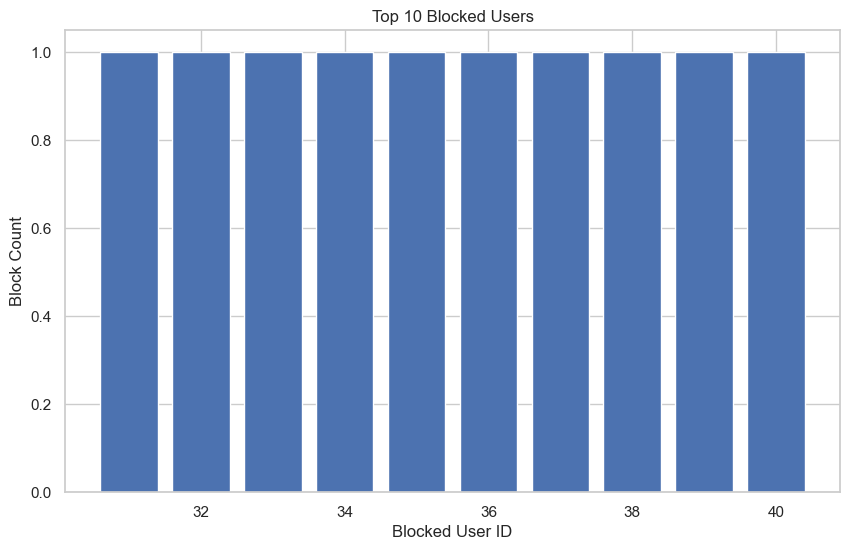

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pymysql

# Define database connection details
db_config = {
    'user': 'root',
    'password': 'NicySahita@20',
    'host': 'localhost',
    'database': 'callerscan1',
}


conn = pymysql.connect(**db_config)



# Visualization 2: Call Duration Distribution Histogram
call_duration_query = "SELECT CallDuration FROM CallLog;"
call_duration_df = pd.read_sql_query(call_duration_query, conn)

plt.figure(figsize=(10, 6))
plt.hist(call_duration_df['CallDuration'], bins=20, edgecolor='black')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Call Duration Distribution')
plt.show()

# Visualization 3: Monthly Call Volume Line Chart
monthly_call_query = "SELECT DATE_FORMAT(CallDateTime, '%Y-%m') AS Month, COUNT(*) AS CallCount FROM CallLog GROUP BY Month;"
monthly_call_df = pd.read_sql_query(monthly_call_query, conn)

plt.figure(figsize=(12, 6))
plt.plot(monthly_call_df['Month'], monthly_call_df['CallCount'], marker='o')
plt.xlabel('Month')
plt.ylabel('Call Count')
plt.title('Monthly Call Volume')
plt.xticks(rotation=45)
plt.show()

# Visualization 4: User Activity Heatmap
user_activity_query = "SELECT EXTRACT(HOUR FROM CallDateTime) AS Hour, EXTRACT(DAY FROM CallDateTime) AS Day, COUNT(*) AS CallCount FROM CallLog GROUP BY Hour, Day;"
user_activity_df = pd.read_sql_query(user_activity_query, conn)

heatmap_data = user_activity_df.pivot('Day', 'Hour', 'CallCount')
plt.figure(figsize=(12, 8))
plt.imshow(heatmap_data, cmap='YlGnBu', aspect='auto')
plt.colorbar(label='Call Count')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Month')
plt.title('User Activity Heatmap')
plt.show()

# Visualization 5: Blocked Users Bar Chart
blocked_users_query = "SELECT BlockedUserID, COUNT(*) AS BlockCount FROM BlockList GROUP BY BlockedUserID ORDER BY BlockCount DESC LIMIT 10;"
blocked_users_df = pd.read_sql_query(blocked_users_query, conn)

plt.figure(figsize=(10, 6))
plt.bar(blocked_users_df['BlockedUserID'], blocked_users_df['BlockCount'])
plt.xlabel('Blocked User ID')
plt.ylabel('Block Count')
plt.title('Top 10 Blocked Users')
plt.show()


# Close the database connection
conn.close()

You are connected to the database


/var/folders/3m/n3x3hw_x27v79r073v4v967r0000gn/T/ipykernel_3381/2259509466.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sample_data = pd.read_sql_query(sample_query, conn)


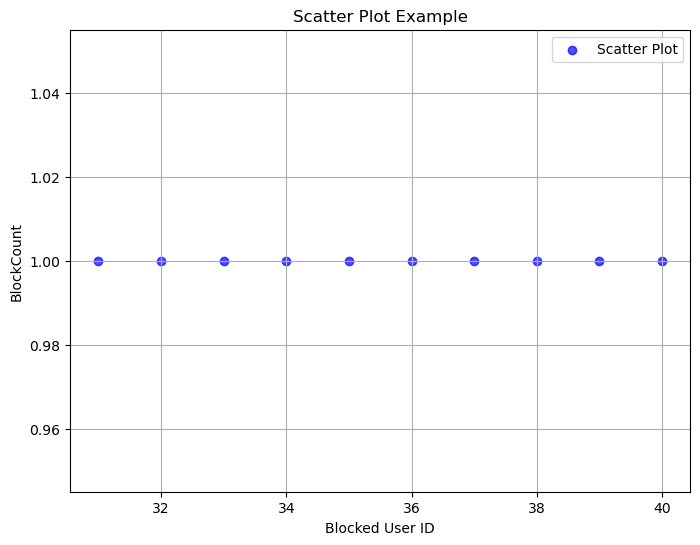

In [ ]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Database connection parameters
db_name = "callerscan1"
db_host = "localhost"
db_username = "root"
db_password = "NicySahita@20"

try:
    conn = pymysql.connect(host=db_host, port=int(3306), user='root', passwd=db_password, db=db_name)
except pymysql.Error as e:
    print(f"Error: {e}")
    conn = None

if conn:
    print("You are connected to the database")

    # Sample data retrieval (replace this with your actual query)
    sample_query = "SELECT BlockedUserID, COUNT(*) AS BlockCount FROM BlockList GROUP BY BlockedUserID ORDER BY BlockCount DESC LIMIT 10;"
    sample_data = pd.read_sql_query(sample_query, conn)

    # Scatter plot using sample data
    plt.figure(figsize=(8, 6))
    plt.scatter(sample_data['BlockedUserID'], sample_data['BlockCount'], label='Scatter Plot', color='blue', alpha=0.7)
    plt.title('Scatter Plot Example')
    plt.xlabel('Blocked User ID')
    plt.ylabel('BlockCount')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Close the database connection
    conn.close()
else:
    print("Error connecting to the database.")


Connected to the database


/var/folders/3m/n3x3hw_x27v79r073v4v967r0000gn/T/ipykernel_3381/2643546292.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  scatter_data = pd.read_sql_query(scatter_query, conn)


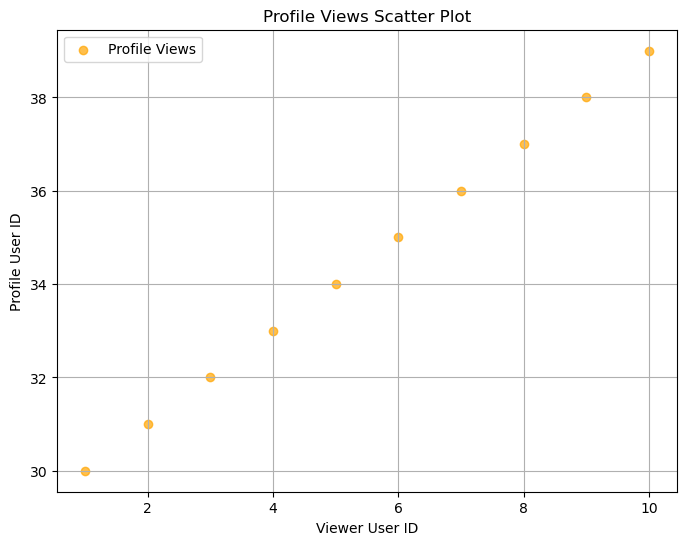

In [ ]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

# Database connection parameters
db_name = "callerscan1"
db_host = "localhost"
db_username = "root"
db_password = "NicySahita@20"  # Replace with your actual password

# Establish a database connection
conn = pymysql.connect(host=db_host, user=db_username, password=db_password, db=db_name)

# Check if the connection is successful
if conn:
    print("Connected to the database")

    # Sample query to fetch data for scatter plot
    scatter_query = "SELECT ViewerUserID, ProfileUserID FROM ProfileView LIMIT 10;"

    # Read data into a Pandas DataFrame
    scatter_data = pd.read_sql_query(scatter_query, conn)

    # Close the database connection
    conn.close()

    # Scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(scatter_data['ViewerUserID'], scatter_data['ProfileUserID'], label='Profile Views', color='orange', alpha=0.7)
    plt.title('Profile Views Scatter Plot')
    plt.xlabel('Viewer User ID')
    plt.ylabel('Profile User ID')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Error connecting to the database.")


Connected to the database


/var/folders/3m/n3x3hw_x27v79r073v4v967r0000gn/T/ipykernel_3381/3425535092.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  scatter_data = pd.read_sql_query(scatter_query, conn)


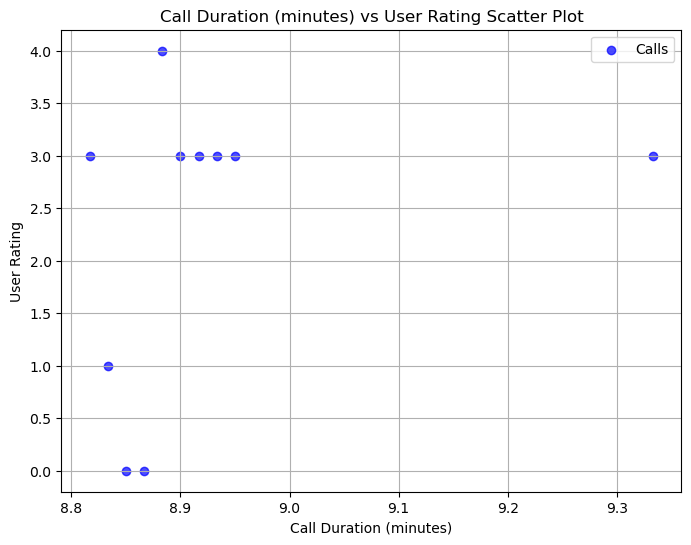

In [ ]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

# Database connection parameters
db_name = "callerscan1"
db_host = "localhost"
db_username = "root"
db_password = "x"  # Replace with your actual password

# Establish a database connection
conn = pymysql.connect(host=db_host, user=db_username, password=db_password, db=db_name)

# Check if the connection is successful
if conn:
    print("Connected to the database")

    # Sample query to fetch data for scatter plot
    scatter_query = """
        SELECT c.CallDuration / 60 AS CallDuration, ur.Rating
        FROM CallLog c
        JOIN UserRating ur ON c.CallerUserID = ur.RatedCallerID
        WHERE ur.Rating IS NOT NULL
        LIMIT 10;
    """

    # Read data into a Pandas DataFrame
    scatter_data = pd.read_sql_query(scatter_query, conn)

    # Close the database connection
    conn.close()

    # Scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(scatter_data['CallDuration'], scatter_data['Rating'], label='Calls', color='blue', alpha=0.7)
    plt.title('Call Duration (minutes) vs User Rating Scatter Plot')
    plt.xlabel('Call Duration (minutes)')
    plt.ylabel('User Rating')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Error connecting to the database.")

